# Lab 1 - Linear Regression
Name: Yadu Krishnan Madhu
Section: 10
Student Number: 500975010

### Without Standardization

Python functions

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

def mean(dataset: list) -> int:
    avg = 0
    for num in dataset:
        avg += num
    return avg / len(dataset)

def std(dataset: list, mean: int) -> float:
    std = 0
    for num in dataset:
        std += (num - mean) ** 2
    return math.sqrt(std / (len(dataset) - 1))

def standardize(x: int, mean: float, std: float) -> float:
    return float((x - mean) / std)

def error(y: list, m: float, x: list, b: float, n: int) -> float:
    err = 0
    for i in range(n):
        err += (y[i] - (m * x[i] + b)) ** 2
    return float(err/n)

def m_grad(y: list, m: float, x: list, b: float, n: int) -> int:
    m_grad = 0
    for i in range(n):
        m_grad += - x[i] * (y[i] - (m * x[i] + b))
    return int((2 * m_grad) / n)

def b_grad(y: list, m: float, x: list, b: float, n: int) -> int:
    b_grad = 0
    for i in range(n):
        b_grad += - (y[i] - (m * x[i] + b))
    return int((2 * b_grad) / n)

def update_grad(x: float, alpha: int, grad: float) -> int:
    return x - (alpha * grad)

# def update_m_b(m: int, b: int, iterations: int, alpha: int) -> ():
#     m = m
#     b = b
#     for i in range(iterations):
#         m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
#         b = update_grad(b, alpha, b_grad(final_marks, b, midterm_marks, b, len(midterm_marks)))
#     return (m, b)


C:\Users\yadu\AppData\Local\Temp\ipykernel_26416\2477717686.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Initializating m, b and $\alpha$ values

In [2]:
m = -0.5
b = 0
alpha = 0.0001

Displaying data points from the data set

Text(0.5, 1.0, 'Midterm Marks vs Final Marks')

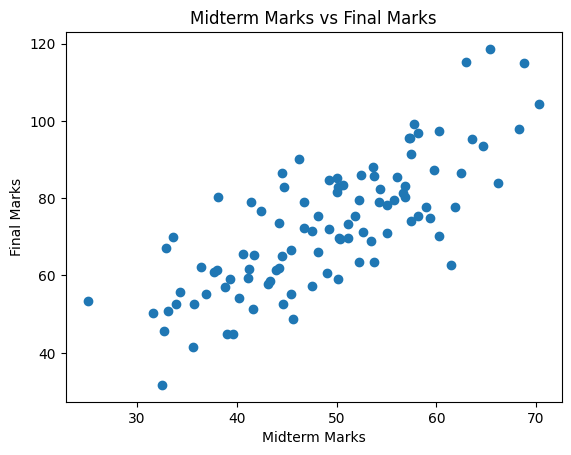

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
global midterm_marks
global final_marks
midterm_marks = data['Midterm mark']
final_marks = data['Final mark']

plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

Displaying the initial regression line

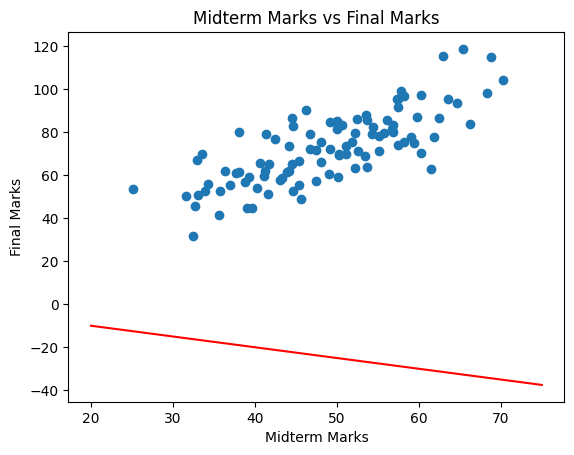

In [4]:
plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(20, 75, 1000)
plt.plot(x_values, x_values * -0.5, 'r')  # inital regression line


Updating m and b a 100 times
Displaying updated linear regression line

1.4789 0.0196


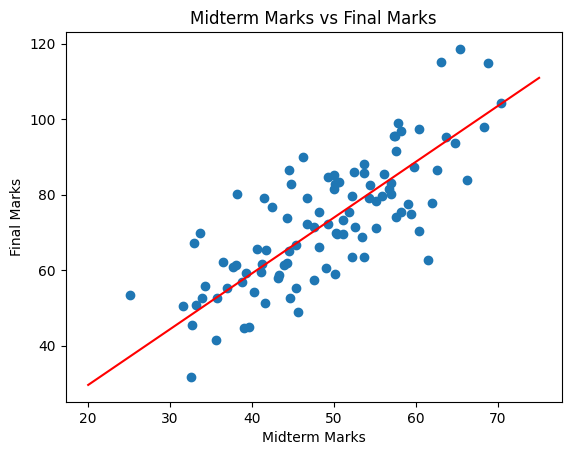

In [5]:
for i in range(100):
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))


plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(20, 75, 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
print(m,b)


Error Graph at each iteration (From 1 to 100)

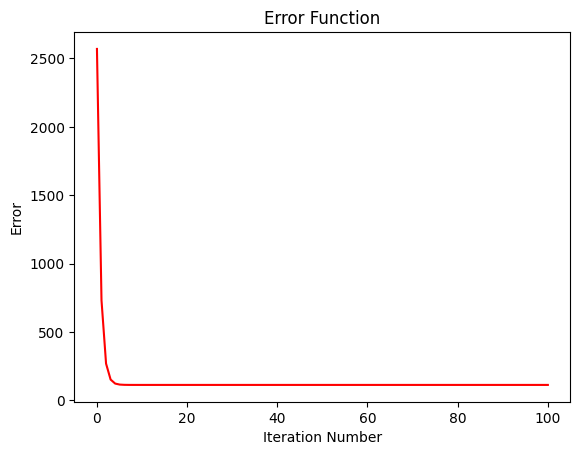

In [6]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(100):
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    error_points.append(error(final_marks, m, midterm_marks, b, len(midterm_marks)))


plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function')

x_values = np.linspace(0, 100, 100)
plt.plot(x_values, error_points, 'r')  # inital regression line

Updating b and m 2000 times


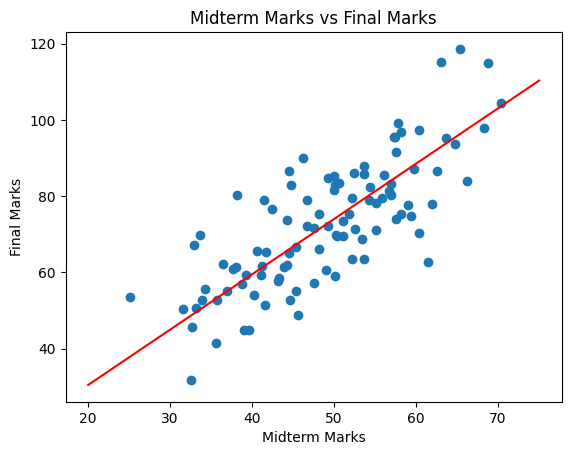

In [7]:
m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, b, midterm_marks, b, len(midterm_marks)))


plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(20, 75, 1000)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line

Error graph for 2000 iterations

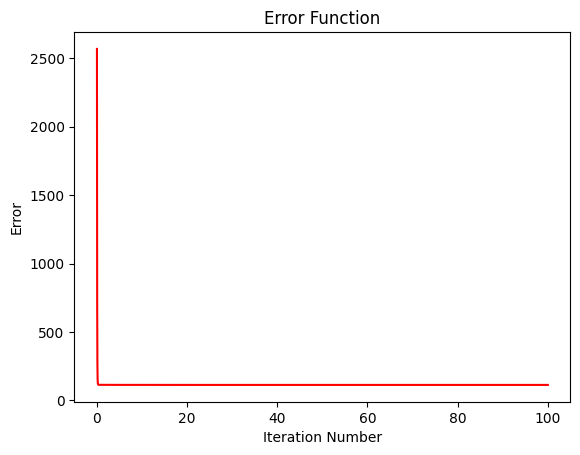

In [8]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):    
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, b, midterm_marks, b, len(midterm_marks)))
    error_points.append(error(final_marks, m, midterm_marks, b, len(midterm_marks)))


plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function')

x_values = np.linspace(0, 100, 2000)
plt.plot(x_values, error_points, 'r')  # inital regression line

### With Standardization


initialize m, b and $\alpha$

In [9]:
m = -0.5
b = 0
alpha = 0.0001

Graph with standardized data points

Text(0.5, 1.0, 'Midterm Marks vs Final Marks')

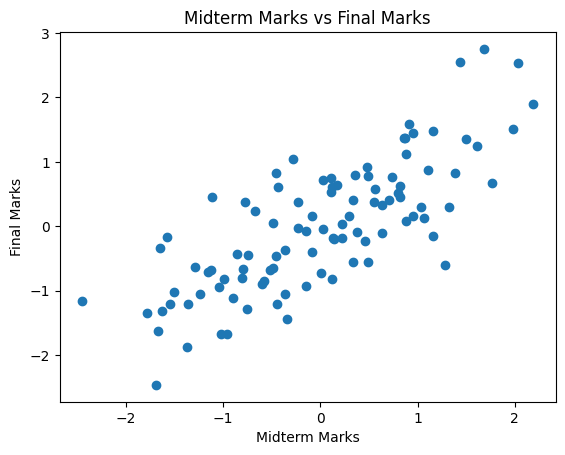

In [10]:
std_midterm_marks = []
midterm_mean = mean(midterm_marks)
midterm_std = std(midterm_marks, midterm_mean)

std_final_marks = []
final_mean = mean(final_marks)
final_std = std(final_marks, final_mean)

for i in range(len(midterm_marks)):
    std_midterm_marks.append(standardize(midterm_marks[i], midterm_mean, midterm_std))
    std_final_marks.append(standardize(final_marks[i], final_mean, final_std))

    
plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')


Graph with standardized points and initial regression line

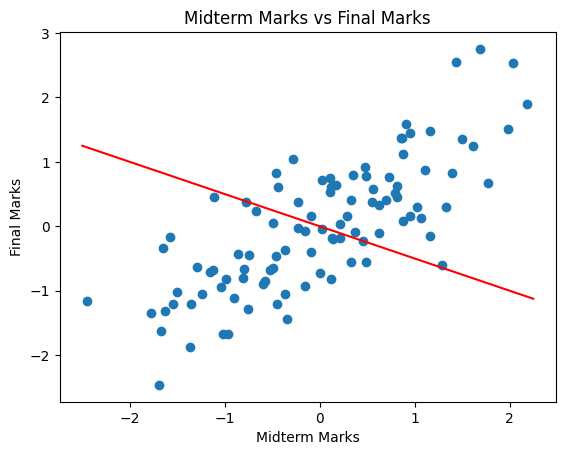

In [11]:
plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(-2.5, 2.25, 100)
plt.plot(x_values, x_values * -0.5, 'r')  # inital regression line

Updating m and b a 100 times and displaying graph

-0.4800000000000022 0.0


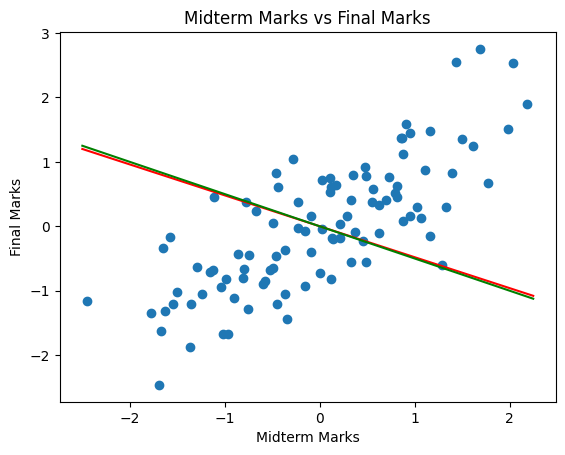

In [12]:
m = -0.5
b = 0
alpha = 0.0001

for i in range(100):
    m_test = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b_test = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    m = m_test
    b = b_test

plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(-2.5, 2.25, 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.plot(x_values, x_values * -0.5, 'g')  # inital regression line
print(m , b)

Error graph for the error function at each iteration (from 0 to 100)

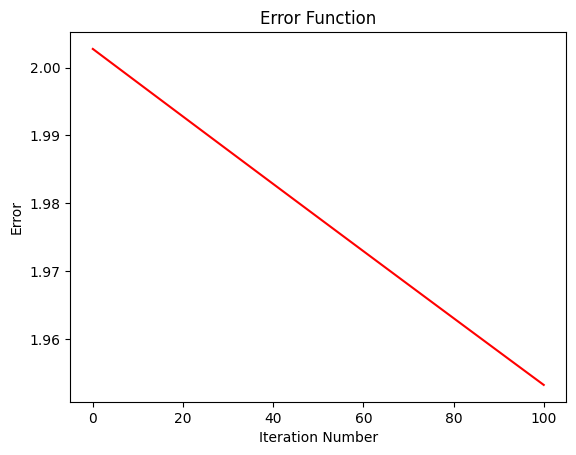

In [13]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(100):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    error_points.append(error(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))

plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function')

x_values = np.linspace(0, 100, 100)
plt.plot(x_values, error_points, 'r')  # inital regression line

Updating m and b for 2000 iterations

-0.16830000000003467 0.0


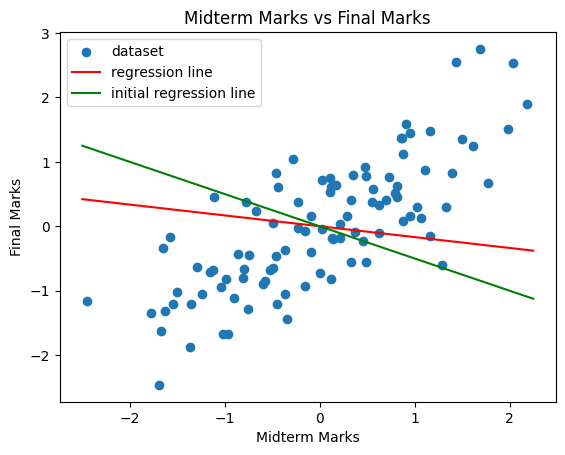

In [14]:
m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    
plt.scatter(std_midterm_marks, std_final_marks)
# plt.legend(["dataset"])
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(-2.5, 2.25, 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.plot(x_values, x_values * -0.5, 'g')  # inital regression line
plt.legend(["dataset", "regression line", "initial regression line"])
print(m , b)

Error graph for the error function for 2000 iterations

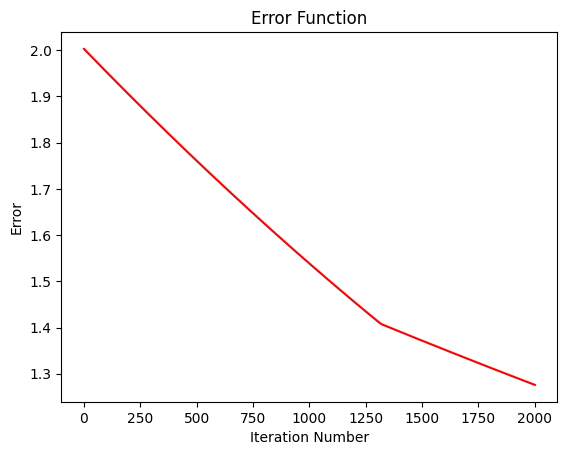

In [15]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    error_points.append(error(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))

plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function')

x_values = np.linspace(0, 2000, 2000)
plt.plot(x_values, error_points, 'r')  # inital regression line